# Investigating EFP Components

In this notebook I want to show the two components of the EFP plotted on the same figure, with the EFP black box.

In [20]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import patches

import sys
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.data_wrangling as data
import functions.plotting as plot

In [7]:
jra = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/jra55_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':30})
jra_djf = data.seasonal_dataset(jra, season='djf')
jra_djf

<xarray.Dataset>
Dimensions:   (time: 177, pressure: 22, latitude: 73)
Coordinates:
  * time      (time) datetime64[ns] 1958-01-14T09:00:00 ... 2016-12-14T09:00:00
  * pressure  (pressure) float32 1e+03 925.0 850.0 700.0 ... 5.0 3.0 2.0 1.0
  * latitude  (latitude) float32 -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
Data variables:
    ubar      (time, pressure, latitude) float32 dask.array<chunksize=(8, 22, 73), meta=np.ndarray>
    div1_pr   (time, pressure, latitude) float32 dask.array<chunksize=(8, 22, 73), meta=np.ndarray>
    div1_qg   (time, pressure, latitude) float32 dask.array<chunksize=(8, 22, 73), meta=np.ndarray>

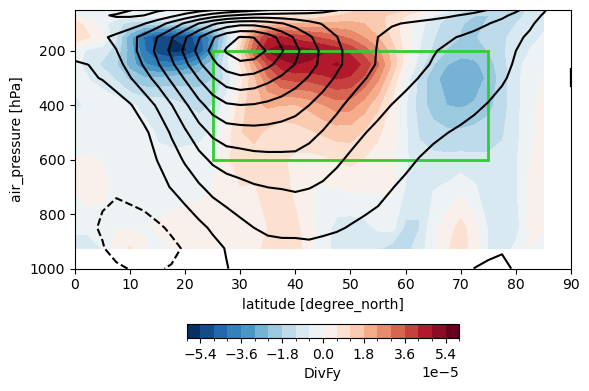

In [31]:
jra_djf = jra_djf.sel(pressure=slice(1000, 50))
jra_djf = jra_djf.sel(latitude=slice(0,90))

jra_djf.ubar.mean('time').plot.contour(levels=20, yincrease=False, colors='k')
jra_djf.div1_pr.mean('time').plot.contourf(levels=20, yincrease=False,
                                           cbar_kwargs={'location': 'bottom', 'shrink': 0.55, 'label': 'DivFy'})

rect = patches.Rectangle((25., 600.), 50, -400,
                         fill=False, linewidth=2, color='limegreen')
plt.gca().add_patch(rect)

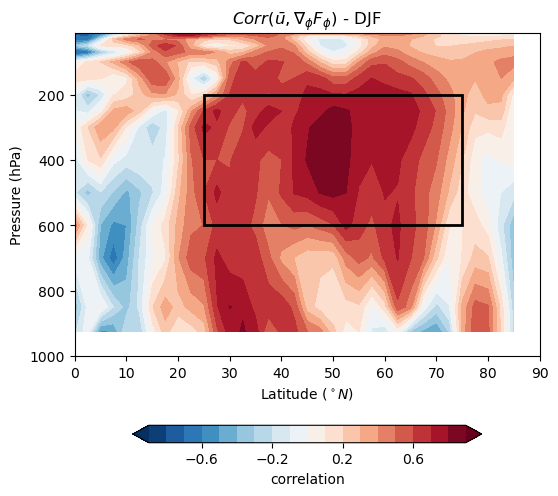

In [23]:
plot.plot_reanalysis_correlation(jra, logscale=False)

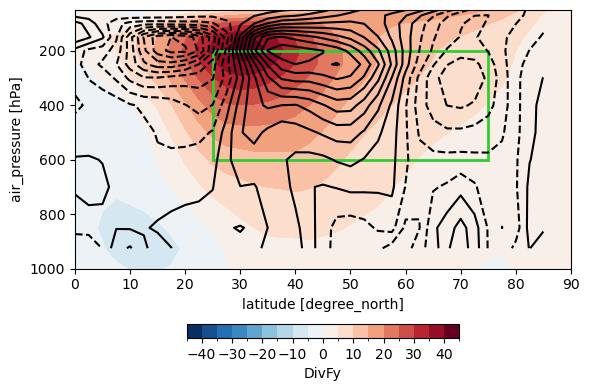

In [32]:
jra_djf.div1_pr.mean('time').plot.contour(levels=20, yincrease=False, colors='k')
jra_djf.ubar.mean('time').plot.contourf(levels=20, yincrease=False,
                                           cbar_kwargs={'location': 'bottom', 'shrink': 0.55, 'label': 'DivFy'})

rect = patches.Rectangle((25., 600.), 50, -400,
                         fill=False, linewidth=2, color='limegreen')
plt.gca().add_patch(rect)